In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key
from pprint import pprint


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [11]:
# List for holding lat_lngs and cities
lat_lngs = [] 
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


611

In [14]:
# lists of data we'll fill from the API

cloudy = []
country = []
date = []
humidity = []
max_temp = []
lat = []
lon = []
wind_speed = []

unit_types = ["metric", "imperial"]

#building the search query
url = "http://api.openweathermap.org/data/2.5/weather?"
search_query = f"{url}appid={api_key}&q={city}&units={unit_types[0]}"

#using the search query and printing it to see what it does
city_list_response = requests.get(search_query)
json = city_list_response.json()
pprint(json)

#This code seemed like such a god idea at the time...
#for city in cities:    
#        weather_response = requests.get(query_url)
#        weather_json = weather_response.json()
#        query_url = url + "appid=" + api_key + "&q=" + city
#        print(f"The city is {city}.")
#
#try:
#    for city in cities:    
#        weather_response = requests.get(query_url)
#        weather_json = weather_response.json()
#        query_url = url + "appid=" + api_key + "&q=" + city
#        print(f"The city is {city}.")
#except KeyError:
#    print("...City not found. Skipping...")

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 4.36, 'lon': -75.74},
 'dt': 1560980932,
 'id': 3688433,
 'main': {'humidity': 69,
          'pressure': 1014,
          'temp': 27.06,
          'temp_max': 28,
          'temp_min': 26},
 'name': 'Buenavista',
 'sys': {'country': 'CO',
         'id': 8610,
         'message': 0.0066,
         'sunrise': 1560941584,
         'sunset': 1560986128,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 200, 'speed': 2.1}}


In [15]:
#prepping the main code by setting up some variables so we can that it works
cityCount = 0
cities_in_df = []

#main for loop, asks API for the data and then stores it the lists
for city in cities:
    time.sleep(1) 
    cityCount+=1
    search_query = f"{url}appid={api_key}&q={city}&units={unit_types[0]}"    
    city_response = requests.get(search_query).json()
    try:        
        country.append(city_response['sys']['country'])
        cloudy.append(city_response['clouds']['all'])
        date.append(city_response['dt'])
        humidity.append(city_response['main']['humidity'])
        max_temp.append(city_response['main']['temp_max'])
        lat.append(city_response['coord']['lat'])
        lon.append(city_response['coord']['lon'])
        wind_speed.append(city_response['wind']['speed'])
        
        print(f"Working on {cityCount} of Set 1 | {city}")
        
        cities_in_df.append(city)
    except:
        
        print(f"{cityCount}, city of {city} not found!")

#if the code works all these numbers should be the same...
print(len(cloudy))
print(len(country))
print(len(lat))
print(len(lon))
print(len(date))
print(len(humidity))
print(len(max_temp))
print(len(wind_speed))
print(len(cities_in_df))


Working on 1 of Set 1 | port alfred
Working on 2 of Set 1 | hilo
Working on 3 of Set 1 | bredasdorp
Working on 4 of Set 1 | lumby
Working on 5 of Set 1 | ushuaia
Working on 6 of Set 1 | airai
Working on 7 of Set 1 | jamestown
Working on 8 of Set 1 | hermanus
Working on 9 of Set 1 | hobart
Working on 10 of Set 1 | victoria
Working on 11 of Set 1 | saldanha
Working on 12 of Set 1 | nkhotakota
13, city of taolanaro not found!
14, city of aflu not found!
Working on 15 of Set 1 | rikitea
Working on 16 of Set 1 | maningrida
Working on 17 of Set 1 | vaini
Working on 18 of Set 1 | praia da vitoria
Working on 19 of Set 1 | aswan
Working on 20 of Set 1 | cape town
Working on 21 of Set 1 | bara
22, city of satitoa not found!
Working on 23 of Set 1 | castro
Working on 24 of Set 1 | novyy yarychiv
Working on 25 of Set 1 | orsha
Working on 26 of Set 1 | mataura
Working on 27 of Set 1 | galveston
Working on 28 of Set 1 | arraial do cabo
Working on 29 of Set 1 | yar-sale
Working on 30 of Set 1 | suhut

Working on 237 of Set 1 | moyamba
Working on 238 of Set 1 | ambulu
Working on 239 of Set 1 | traverse city
Working on 240 of Set 1 | imbituba
Working on 241 of Set 1 | praia
Working on 242 of Set 1 | mana
Working on 243 of Set 1 | kawalu
Working on 244 of Set 1 | nadvoitsy
Working on 245 of Set 1 | namibe
Working on 246 of Set 1 | copiapo
Working on 247 of Set 1 | fort nelson
Working on 248 of Set 1 | igarka
Working on 249 of Set 1 | el alto
Working on 250 of Set 1 | guerrero negro
Working on 251 of Set 1 | talnakh
Working on 252 of Set 1 | avera
Working on 253 of Set 1 | kimbe
Working on 254 of Set 1 | rivadavia
Working on 255 of Set 1 | klaksvik
Working on 256 of Set 1 | vila
Working on 257 of Set 1 | lompoc
Working on 258 of Set 1 | palmas bellas
Working on 259 of Set 1 | necochea
Working on 260 of Set 1 | samfya
Working on 261 of Set 1 | thunder bay
Working on 262 of Set 1 | taoudenni
263, city of barentsburg not found!
Working on 264 of Set 1 | vila franca do campo
Working on 265 

473, city of kousseri not found!
Working on 474 of Set 1 | bubaque
Working on 475 of Set 1 | inhambane
Working on 476 of Set 1 | mgandu
Working on 477 of Set 1 | mahebourg
Working on 478 of Set 1 | cairns
Working on 479 of Set 1 | penzance
Working on 480 of Set 1 | abu kamal
Working on 481 of Set 1 | pochutla
Working on 482 of Set 1 | dilla
Working on 483 of Set 1 | ushtobe
Working on 484 of Set 1 | seriate
Working on 485 of Set 1 | ampanihy
Working on 486 of Set 1 | ajdabiya
Working on 487 of Set 1 | flinders
Working on 488 of Set 1 | farafangana
Working on 489 of Set 1 | margate
Working on 490 of Set 1 | porto torres
Working on 491 of Set 1 | visnes
Working on 492 of Set 1 | palu
Working on 493 of Set 1 | pisco
Working on 494 of Set 1 | along
Working on 495 of Set 1 | alice town
Working on 496 of Set 1 | marzuq
Working on 497 of Set 1 | pontiac
Working on 498 of Set 1 | tongren
Working on 499 of Set 1 | muttupet
Working on 500 of Set 1 | badou
501, city of dubenskiy not found!
Workin

In [19]:
#putting the results into a Panda
weather_data_df = pd.DataFrame({
    "City": cities_in_df,
    "Country": country,
    "Lat": lat,
    "Lng": lon,
    "Date": date,
    "Cloudlieness": cloudy,
    "Humidity": humidity,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})

#saving the weather data to a file and getting a peek to make sure it all works
weather_data_df.to_csv("output_data/weather_df.csv", index=False, header=True)
weather_data_df.head()

,City,Country,Lat,Lng,Date,Cloudlieness,Humidity,Max Temp,Wind Speed
0,port alfred,ZA,-33.59,26.89,1560981161,100,37,20.56,3.58
1,hilo,US,19.71,-155.08,1560981162,75,51,29.00,5.10
2,bredasdorp,ZA,-34.53,20.04,1560981163,100,62,11.00,0.50
3,lumby,CA,50.25,-118.97,1560981164,90,71,18.33,3.60
4,ushuaia,AR,-54.81,-68.31,1560981165,40,69,3.00,10.80


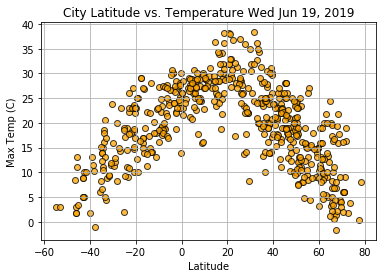

In [22]:
#Starting the scatter plots
x_axis = np.arange(-60, 100, 20)
x_axis

#lat vs. Temperature scatter plot
plt.title("City Latitude vs. Temperature Wed Jun 19, 2019")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"], marker="o", color="orange", alpha=0.75, edgecolor="black")
plt.grid()
plt.savefig("output_data/latitudevsdegc.png")
plt.show()


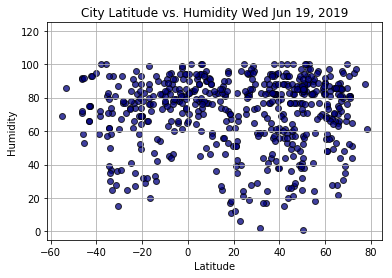

In [24]:
plt.title("City Latitude vs. Humidity Wed Jun 19, 2019")
plt.xlabel("Latitude")
plt.ylabel("Humidity")


plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], marker="o", color="navy", alpha=0.75, edgecolor="black")

#limit y axis height to exclude outlier data point of ~300, which distorts chart
plt.ylim(-5, 125)

plt.grid()
plt.savefig("output_data/latitudevhumidity.png")
plt.show()

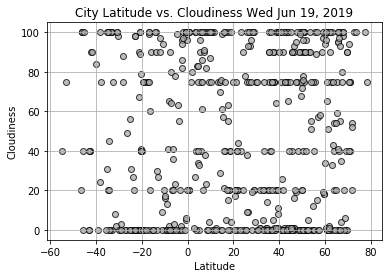

In [26]:
#cloudiness scatter plot
plt.title("City Latitude vs. Cloudiness Wed Jun 19, 2019")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudlieness"], marker="o", color="darkgray", alpha=0.75, edgecolor="black")
plt.grid()
plt.savefig("output_data/latvcloud.png")
plt.show()


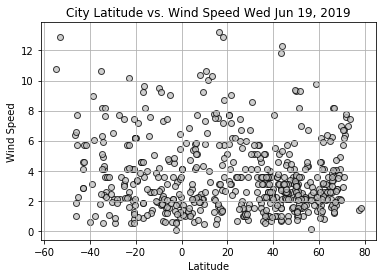

In [27]:
#wind speed scatter plot
plt.title("City Latitude vs. Wind Speed Wed Jun 19, 2019")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], marker="o", color="silver", alpha=0.75, edgecolor="black")
plt.grid()
plt.savefig("output_data/latvwind.png")
plt.show()